# DECALs Galaxy Survey Data
In this notebook, we are going to see how to load the images of our galaxies. This data is taken from the astroNN dataset for DECALs galaxies. According to their website, the dataset contains "17736 256x256 pixels colored galaxy images (g, r and z band) separated in 10 classes." The classes are from the [galaxy zoo 2 dataset](https://data.galaxyzoo.org/). The authors of the [astroNN](https://astronn.readthedocs.io/en/latest/index.html) code did a wonderful job preparing the data, so we will use theirs :) 

We will first start with importing [h5py](https://www.h5py.org/), numpy, matplotlib and seaborn. H5 files are rapidly becoming one of the standards in astronomy, so it is worth using.

Please note that the h5 file is BIG (2.7Gb), so it will take some time to read all of that information into memory :)

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To get the images and labels from file
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])

# To convert to desirable type
labels = labels.astype(np.float32)
images = images.astype(np.float32)

## Plotting
Let's take a look at a handful of images (3 to be exact) and print out their labels. We are going to look at the g, r, and z bands.

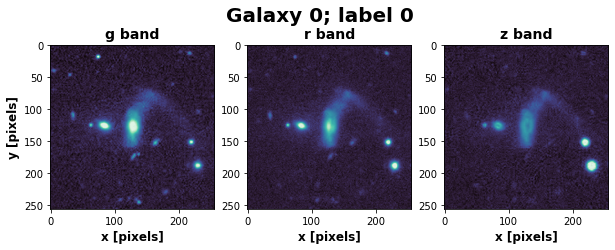

In [2]:
for gal_ct, gal in enumerate(images[:1]):  # Step through a galaxy -- you could make this plot out more and save them if you felt so inclined
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3.5))
    fig.suptitle('Galaxy %i; label %i'%(gal_ct,labels[gal_ct]), fontsize=20, fontweight='bold')
    ax1.imshow(gal[:,:,0], cmap='mako')
    ax1.set_xlabel('x [pixels]', fontsize=12, fontweight='bold')
    ax1.set_ylabel('y [pixels]', fontsize=12, fontweight='bold')
    ax1.set_title('g band', fontsize=14, fontweight='bold')
    ax2.imshow(gal[:,:,1], cmap='mako')
    ax2.set_xlabel('x [pixels]', fontsize=12, fontweight='bold')
    ax2.set_title('r band', fontsize=14, fontweight='bold')
    ax3.imshow(gal[:,:,2], cmap='mako')
    ax3.set_xlabel('x [pixels]', fontsize=12, fontweight='bold')
    ax3.set_title('z band', fontsize=14, fontweight='bold')

With these we can start playing with the machine learning side of things! I suggest you start with a single band and eventually add in the other bands :) 

# Suggestions
While there are many ways you can go about tackling the problem of classifying galaxies using these images, we suggest a few avenues:
 - Start with using a convolutional neural network to classify images using a single band
 - Try using convolutional steps on each images separetely, then combining the latent spaces, and using a neural network to complete the classification
 - Explore other classification schema such as random forests or boosted decision trees
 - Does using an auto-encoder to compress the data help with the classification?
 - Can you switch this to a regression problem and regress on certain parameters?